# MIDAS estimator in python (w numpy)
## Example on site P287 using Mintpy gps module

In [1]:
from mintpy.objects import gps
from midas import midas
from datetime import datetime
import numpy as np

from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# Use Mintpy object to download gnss timeseries data - example P287
gps_site = gps.GPS(site='P287')
gps_site.open()

#Extract dates and displacement arrays
ts_disp  = np.array([gps_site.dis_e, gps_site.dis_n, gps_site.dis_u]).T
ts_dates = gps_site.dates

# Add steps manually
steps = []
steps.append(datetime(2019,7,6))
steps.append(datetime(2020,8,6))

calculating station lat/lon
reading time and displacement in east/north/vertical direction


East:  vel. -38.95 ± 0.17 mm/yr, intercept 604.32 mm/yr,
North: vel. 21.44 ± 0.14 mm/yr, intercept 235.09 mm/yr,
Up:    vel. 0.47 ± 0.38 mm/yr, intercept 752.37 mm/yr,


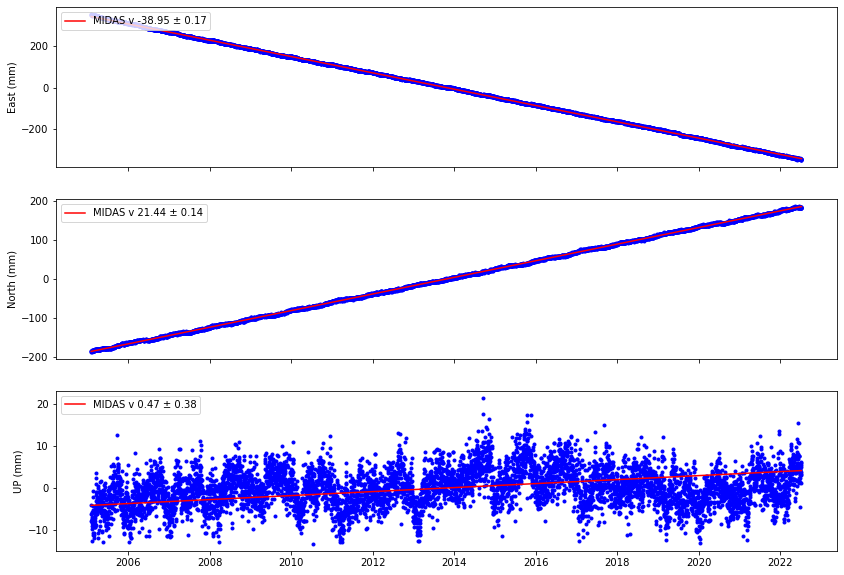

In [3]:
# MIDAS calculation

[midas_vel, midas_vstds, midas_intercept, midas_residuals] = midas(ts_dates, ts_disp, steps=steps, display=True)

result = [print(txt + f' vel. {v:.2f} \u00B1 {std:.2f} mm/yr, intercept {b:.2f} mm/yr,') 
          for i, (txt, v, std, b) in enumerate(
           zip(['East: ', 'North:', 'Up:   '], midas_vel[0]*1000, midas_vstds[0]*1000, midas_intercept[0]*1000)
           )]

In [4]:
Image(url= "http://geodesy.unr.edu/tsplots/IGS14/IGS14/TimeSeries/P287.png", width=900, height=1200)

In [9]:
# Example how to get decimal years - convention JPL for GIPSY time series (first epoch - Jan. 01, 2000)
from datetime import datetime
decimal_years = [(2000 + (date - datetime(2000,1,1)).days / 365.25) for _,date in enumerate(ts_dates)]

print(decimal_years[:10])

[2005.09787816564, 2005.100616016427, 2005.1033538672143, 2005.1060917180014, 2005.1088295687885, 2005.1115674195755, 2005.1143052703628, 2005.11704312115, 2005.119780971937, 2005.1225188227243]
